# Detección y tratamiento de valores atípicos


## Boston Dataset

The features can be summarized as follows:

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per 10000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent - by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s

In [1]:
#Load libraries
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


In [2]:
#Load data: Boston dataset

# Source:https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755
    
    
X, y = load_boston(return_X_y=True)

#Create data frame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
len(df)

506

## Detección

- Visual: boxplot 
- Técnicas estadísticas

### Visualización de valores atípicos (Box plot)

Un primer paso útil para detectar valores atípicos univariados es la visualización de la <b> distribución de una variable</b>, por ejemplo, mediante un boxplot.

En un boxplot, los datos se dividen en cuartiles. Un boxplot muestra un cuadro rectangular que representa el 25% -75% de las observaciones de una muestra, extendido por los llamados bigotes que alcanzan la entrada de datos mínima y máxima. Las observaciones que se muestran fuera de los bigotes son valores atípicos.


#### a. Variables individuales



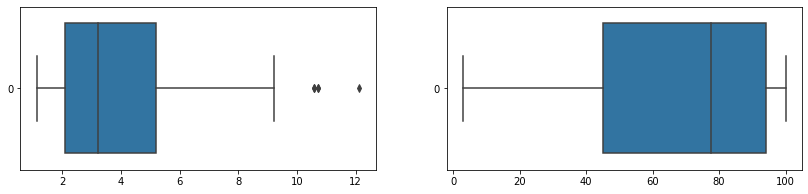

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=[14,3])

#DIS: This is the weighted distances to five Boston employment centers
sns.boxplot(data=df['DIS'], orient="h", ax=axs[0])

#This is the proportion of owner-occupied units built prior to 1940
sns.boxplot(data=df['AGE'], orient="h", ax=axs[1])

plt.show()

El gráfico anterior, para DIS, muestra tres puntos entre 10 y 12, estos son valores atípicos ya que no están  cerca de los cuartiles. Mientras que AGE no muestra valores atípicos.


<b> b. Gráficos de grupo</b>

Primero describir el dataset (describe()) para tener una idea de la escala de cada variable y luego crear los boxplot por  grupo.

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


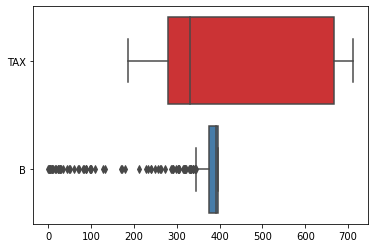

In [6]:
#TAX: This is the full-value property-tax rate per 10000
# B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent - by town

df_1 = df[['TAX', 'B']]

ax = sns.boxplot(data=df_1, orient="h", palette="Set1")

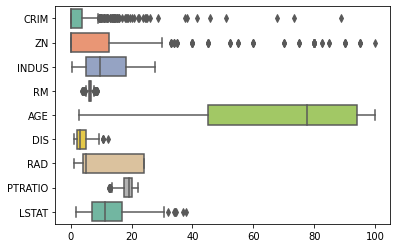

In [7]:
#distribuciones de todas las variables mediante un gráfico de grupo (cuando tienen escala similar):

df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

Hay tres variables (INDUS, AGE y RAD), sin outliers univariados. Todas las demás variables tienen puntos de datos más allá de sus bigotes.

Según el boxplot de La variable "CRIM" (codifica la tasa de delincuencia per cápita por ciudad), la tasa de criminalidad en la mayoría de las ciudades está por debajo del 5%.

0.0    471
1.0     35
Name: CHAS, dtype: int64


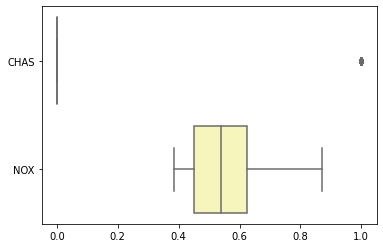

In [8]:
df_3 = df[['CHAS', 'NOX']]
print(df_3['CHAS'].value_counts())
ax = sns.boxplot(data=df_3, orient="h", palette="Set3")

<AxesSubplot:>

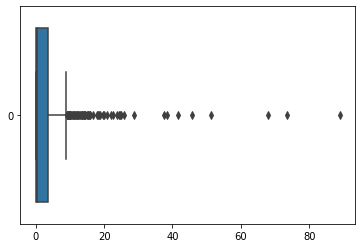

In [9]:
sns.boxplot(data=df['CRIM'], orient="h")


Un boxplot nos permite saber que hay valores atípicos pero no nos permite identificar los índices reales de las observaciones periféricas, por eso usamos técnicas estadísticas para su detección.

### Técnicas estadísticas para la detección

Otros métodos cuantitativos usados en estadística para la detección de valores atípicos univariados:

- Método Tukey’s box plot
- z-score method
- IQR score
- Método Median Absolute Deviation

<b> Tukey’s box plot</b>

Es un boxplot que distingue entre valores atípicos posibles y probables. Un posible valor atípico se encuentra entre la valla interior y exterior, mientras que un valor atípico probable se encuentra fuera de la valla exterior.

Las valla interna (inner fence) y externa (outer fence) generalmente no se muestran en el diagrama de caja real, pero se pueden calcular utilizando el rango intercuartílico (IQR) de la siguiente manera:

- IQR = Q3 - Q1 ->  Q3 = 75 cuartil y Q1 = 25 cuartil

- inner fence = [Q1-1.5 * IQR, Q3 + 1.5 * IQR]

- outer fence = [Q1–3 * IQR, Q3 + 3 * IQR]

La valla interior de la distribución se define como 1,5 x IQR por debajo de Q1 y 1,5 x IQR por encima de Q3.

La valla exterior se define como 3 x IQR por debajo de Q1 y 3 x IQR por encima de Q3.

Siguiendo a Tukey, se consideran los valores atípicos probables a aquellos que se encuentran fuera de la valla exterior. 


In [10]:
#Tukey's method

def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [11]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")
# Cálculo directo de outliers probables:

df["CRIM"][probable_outliers_tm].sort_values() # outliers probables


477    15.0234
437    15.1772
376    15.2880
468    15.5757
425    15.8603
381    15.8744
385    16.8118
379    17.8667
415    18.0846
374    18.4982
412    18.8110
375    19.6091
384    20.0849
406    20.7162
440    22.0511
387    22.5971
378    23.6482
386    24.3938
403    24.8017
400    25.0461
417    25.9406
413    28.6558
427    37.6619
398    38.3518
404    41.5292
414    45.7461
410    51.1358
405    67.9208
418    73.5341
380    88.9762
Name: CRIM, dtype: float64

In [12]:
df["CRIM"][possible_outliers_tm].sort_values() # outliers posibles, necesitan más atención

382     9.18702
371     9.23230
448     9.32909
429     9.33889
439     9.39063
         ...   
414    45.74610
410    51.13580
405    67.92080
418    73.53410
380    88.97620
Name: CRIM, Length: 66, dtype: float64

30 observaciones de la variable CRIM pueden considerarse probables y 66 como posibles y necesitan más atención. 

La gran ventaja del método de diagrama de caja de Turkey es que las estadísticas (por ejemplo, IQR, valla interior y exterior) son robustas a valores atípicos, lo que significa que encontrar un valor atípico es independiente de todos los demás valores atípicos. Además, las estadísticas son fáciles de calcular y <b> este método no requiere una distribución normal de los datos</b>, lo que a menudo no está garantizado en entornos de la vida real. 

Si una distribución está muy sesgada (generalmente se encuentra en datos de la vida real), cada valor se transforma a su logaritmo antes de calcular las vallas interior y exterior.


c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

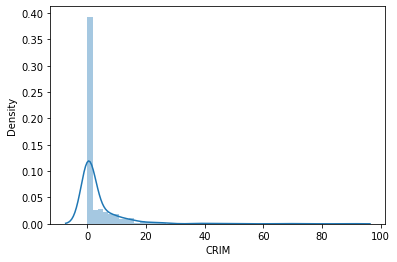

In [60]:
sns.distplot(df['CRIM'])


c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM_log', ylabel='Density'>

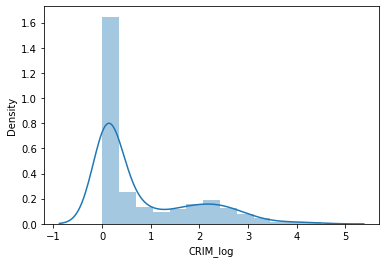

In [14]:
#Transformar 'CRIM' a su valor logaritmo: 
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df['CRIM_log'])



In [15]:
#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

[]
[380, 404, 405, 410, 414, 418]


<b> z-score </b>

También conocido como método de puntuación z. Para cada observación (Xn), se mide cuántas desviaciones estándar está el punto de datos lejos de su media (X̄).


Siguiendo una regla general común, si z > C, donde C generalmente se establece en 3, la observación se marca como un valor atípico. Esta regla se deriva del hecho de que si una variable tiene una distribución normal, el 99,7% de todos los puntos de datos se ubican 3 desviaciones estándar alrededor de la media. 

In [16]:
# Cálculo mediante spacy. Aplicación a una variable

from scipy import stats
import numpy as np

z_CRIM = np.abs(stats.zscore(df.CRIM))  # Cálculo de CRIM

z_CRIM3 = np.where(z_CRIM > 3)  # filtrar según el umbral 
z_CRIM3 = list(z_CRIM3[0])

print(z_CRIM3) # index

df["CRIM"][z_CRIM3] # índices y valores atípicos de CRIM

[380, 398, 404, 405, 410, 414, 418, 427]


380    88.9762
398    38.3518
404    41.5292
405    67.9208
410    51.1358
414    45.7461
418    73.5341
427    37.6619
Name: CRIM, dtype: float64

Cuando se utiliza el método z-score, las observaciones se marcan como valores atípicos. Sin embargo, <b> este método es muy limitado </b> ya que la media de las distribuciones y la desviación estándar son sensibles a valores atípicos. Esto significa que encontrar un valor atípico depende de otros valores atípicos, ya que cada observación afecta directamente a la media.

Además, el método de z-score asume que la variable de interés se distribuye normalmente. Un método más robusto que se puede utilizar en su lugar son los residuos estudiados externamente. Aquí, la influencia del punto de datos examinado se elimina del cálculo de la media y la desviación estándar.


<b> IQR score </b>

El diagrama de caja usa el método IQR (rango intercuartílico, medida de dispersión estadística) para mostrar datos y valores atípicos (forma de los datos), pero para obtener una lista de valores atípicos identificados, necesitaremos usar la fórmula matemática y recuperar los datos atípicos.

IQR es el primer cuartil restado del tercer cuartil; estos cuartiles se pueden ver claramente en un diagrama de caja en los datos.

In [17]:
Q1 = df.CRIM.quantile(0.25)
Q3 = df.CRIM.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3.5950375


A partir de IQR, encontrar los valores atípicos. 

In [18]:
#El siguiente código dará una salida con algunos valores verdaderos y falsos.
# El punto de datos donde tenemos Falso significa que estos valores son válidos,
# mientras que Verdadero indica la presencia de un valor atípico.
print(df.CRIM < (Q1 - 1.5 * IQR))
print(df.CRIM > (Q3 + 1.5 * IQR))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CRIM, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CRIM, Length: 506, dtype: bool


In [19]:
print(df.CRIM[df.CRIM < (Q1 - 1.5 * IQR)]) # valores atípicos
print(df.CRIM[df.CRIM > (Q3 + 1.5 * IQR)])

Series([], Name: CRIM, dtype: float64)
367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: CRIM, Length: 66, dtype: float64


<b>Median Absolute Deviation (MAD) method</b>


Este método reemplaza al método anterior con estadísticas más sólidas, como la desviación absoluta de la mediana y la mediana. 


La estadística se calcula z-score pero utilizando estadísticas sólidas. Además, para identificar las observaciones periféricas, se utiliza el mismo punto de corte de 3. Si la estadística se encuentra por encima de 3, se marca como un valor atípico. En comparación con los residuales studentizados internamente (z-score) y externamente, este método es más robusto a los valores atípicos y supone que X está distribuido paramétricamente.




In [20]:
#MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier



In [21]:
outlier_mad = mad_method(df, 'CRIM')
print(outlier_mad)

[20, 31, 32, 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]


<ipython-input-20-4a7233aa5116>:6: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))


Podemos ver que el método MAD detecta 165 valores atípicos para CRIM.


Hay diferentes formas de detectar valores atípicos univariados, cada una con sus ventajas y desventajas. El z-score debe aplicarse de manera crítica debido a su sensibilidad a la desviación estándar y media y su suposición de una variable distribuida normalmente. 

En cambio, el método MAD se utiliza a menudo y sirve como una alternativa más sólida. El método de diagrama de caja de Tukey ofrece resultados sólidos y se puede ampliar fácilmente cuando los datos están muy sesgados.

Para decidir el enfoque correcto para un conjunto de datos, se debe examinar la distribución de las variables y utilizar su conocimiento del dominio.


### Outliers multivariados:


- Scatter plot: 

Como sugiere la definición, el diagrama de dispersión es la colección de puntos que muestra valores para dos variables. Podemos intentar dibujar un diagrama de dispersión para dos variables.

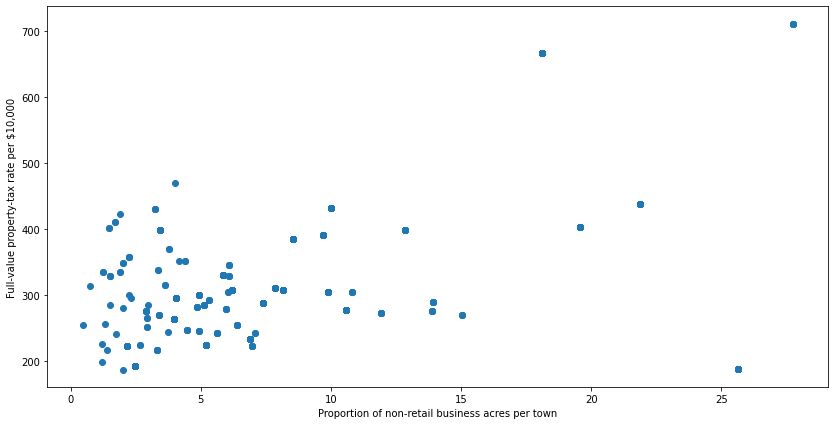

In [22]:
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

Mirando el gráfico de arriba, podemos ver que la mayoría de los puntos de datos se encuentran en el lado inferior izquierdo, pero hay puntos que están lejos de la población, como la esquina superior derecha.

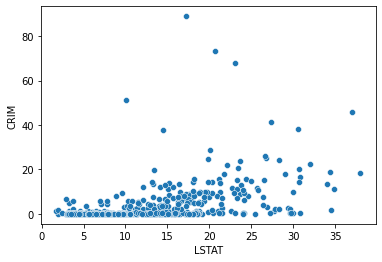

In [23]:
# Otro caso:

df_bivariate = df[["LSTAT", "CRIM"]]

ax = sns.scatterplot(x="LSTAT", y="CRIM", data=df)



Al igual que los diagramas de caja, los diagramas de dispersión visualizan muy bien las observaciones periféricas, pero no las identifican ni las marcan para facilitar el tratamiento. Cuando se trata de valores atípicos multivariados, las métricas de distancia pueden ser útiles para la detección. 

<b> Usando métricas de distancia </b>

Con métricas de distancia, se determina la distancia entre dos vectores. Estos dos vectores pueden ser dos observaciones diferentes (filas) o una observación (fila) en comparación con el vector medio (fila de medias de todas las columnas). Las métricas de distancia se pueden calcular independientemente del número de variables en el conjunto de datos (columnas).

- Distancia de Mahalanobis (MD)

Una métrica de distancia que se puede utilizar para detectar valores atípicos multivariados.

El MD es una medida que determina la distancia entre un punto de datos x y una distribución D. Es una generalización multivariante de z-score. Esto significa que la DM define cuántas desviaciones estándar x está lejos de la media de D.

Al igual que z-score, la DM de cada observación se compara con un punto de corte. Suponiendo una distribución normal multivariante de los datos con K variables, la distancia de Mahalanobis sigue una distribución chi-cuadrado con K grados de libertad.



In [24]:
# Usando un nivel de significancia de 0.01%, buscamos valores atípicos bivariados.

import scipy as sp
from scipy.stats import chi2

def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md



In [25]:
outliers_mahal_bi, md_bi = mahalanobis_method(df=df_bivariate) # analizando ["LSTAT", "CRIM"]

print(outliers_mahal_bi)  # outliers
#print(md_bi) # distancias

[380, 398, 404, 405, 410, 414, 418, 427]


In [26]:
# Aplicado a todo el datasset
outliers_mahal, md = mahalanobis_method(df=df.iloc[:, range(13)]) # de las columnas normales
print(outliers_mahal)

#Forma recomendada para filtrar los valores atípicos.


[152, 155, 214, 353, 364, 365, 367, 380, 405, 410, 414, 418, 488, 489, 490, 491, 492]


Usando la distancia de Mahalanobis, podemos ver que 8 observaciones están marcadas como valores atípicos bivariados. Al incluir todas las variables del conjunto de datos de Boston (gl = 13), detectamos 17 valores atípicos multivariados.

La observación 398 en el subconjunto de dos variables, es un valor atípico. Sin embargo, al considerar el conjunto de datos completo, no lo es. Por lo tanto, cuando ejecutamos nuestro propio proyecto de ciencia de datos, debemos asegurarnos de incluir solo variables que sean interesantes para su análisis posterior. De lo contrario, algunas observaciones pueden marcarse como valores atípicos debido a una variable irrelevante.

Un <b> inconveniente del MD es que usa la media aritmética y la matriz de covarianza</b> y, con eso, es muy sensible a los valores atípicos en los datos. Existen varios métodos que utilizan estimaciones robustas para µ y C. Para evitar esos problemas podemos utilizar el método del determinante de covarianza mínimo (MCD).

- Robust Mahalanobis Distance (MCD) ******* <b> Recomenda para cualquier datasets:</b>

El método de determinante de covarianza mínima (MCD) proporciona estimaciones sólidas para µ y C utilizando solo un subconjunto de la muestra. 

sklearn de Python incluye una función para ajustar el MCD a cualquier conjunto de datos. 

In [137]:
#Robust Mahalonibis Distance

from sklearn.covariance import MinCovDet
import scipy
import sp


def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md


SyntaxError: invalid syntax (sp.py, line 68)

In [28]:
outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df_bivariate)
#[141, 374, 380, 398, 404, 405, 410, 414, 418, 427]

outliers_mahal_rob_bi

[141, 380, 398, 404, 405, 410, 414, 418, 427]

In [29]:
# Para todas las variables:

outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=df.iloc[:, range(13)])

outliers_mahal_rob


[123,
 126,
 142,
 152,
 155,
 163,
 214,
 283,
 353,
 364,
 365,
 367,
 380,
 405,
 410,
 418,
 488,
 489,
 490,
 491,
 492]

Podemos ver que el MD robusto encuentra algunos valores atípicos más que el MD clásico. 10 valores atípicos bivariados para el ejemplo del conjunto de datos 2D y 21 valores atípicos multivariados al considerar todas las características del conjunto de datos de Boston.

Los dos gráficos a continuación (basados en el ejemplo del conjunto de datos 2D) ayudan a visualizar la diferencia entre la medición de distancia clásica (izquierda) y robusta (derecha):

In [30]:
# Visualización

import copy

#You need deep copy otherwise cannot 
#add column to a slice of a DataFrame
df_bi_cp = copy.deepcopy(df_bivariate) 

#Add md and robust md to copy of dataframe
df_bi_cp['md'] = md_bi
df_bi_cp['md_robust'] = md_rb_bi

def flag_outliers(df, outliers):
    flag = []
    for index in range(df.shape[0]):
        if index in outliers:
            flag.append(1)
        else:
            flag.append(0)
    return flag

#Flag outliers with 1, others with 0
df_bi_cp['flag'] = flag_outliers(df_bivariate, outliers_mahal_bi)
df_bi_cp['flag_rob'] = flag_outliers(df_bivariate, outliers_mahal_rob_bi)


c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


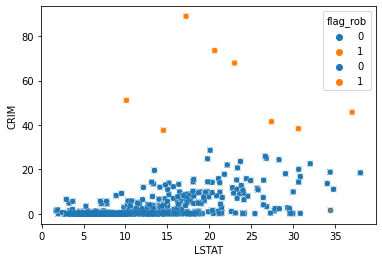

In [31]:
#MD classic
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag', data=df_bi_cp)
#MD robust
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag_rob', marker = 'x', data=df_bi_cp)

Además de los valores atípicos univariados, también es importante examinar un conjunto de datos subyacentes en busca de valores atípicos multivariados. Ambos tipos de valores atípicos pueden afectar significativamente los resultados de un análisis de datos o proyectos de aprendizaje automático. 


Existen varias otras formas de detectar valores atípicos univariados y multivariados, como los k vecinos más cercanos o DBSCAN. No existe un método correcto o incorrecto, pero uno podría ser más apropiado que otro para un determinado conjunto de datos.



#### Cálculo estadístico mediante spacy

In [32]:
# Cálculo estadístico mediante spacy. Todas las variables

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))

threshold = 3
print(np.where(z > threshold))


print(df.iloc[55, 1]) # observación 55, columna 1

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 380, 380, 398, 398, 404, 404, 405, 405, 405, 406, 410, 410,
       410, 410, 411, 412, 412, 414, 414, 414, 415, 416, 418, 418, 418,
       418, 419, 423, 424, 425, 426, 427, 427, 427, 429, 431, 436, 437,
       438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0, 13, 14,
        0, 13,  0, 13,  0, 13, 14,  5,  0, 11, 13, 14, 11, 11

In [33]:
df['ZN'][55]

df['ZN'].sort_values()

505      0.0
439      0.0
440      0.0
441      0.0
442      0.0
       ...  
203     95.0
200     95.0
199     95.0
204     95.0
57     100.0
Name: ZN, Length: 506, dtype: float64

## Tratamiento de valores atípicos: corregir/eliminar

Ahora que sabemos cómo detectar los valores atípicos, es importante comprender si es necesario eliminarlos o corregirlos.

<b> Z-score </b>

Una vez que se han detectado los valores atípicos utilizando z-score, podemos eliminarlos o filtrar los valores atípicos y obtener los datos limpios. 

In [119]:
# Eliminar las observaciones con valores los valores atípicos.

z = np.abs(stats.zscore(df))

#########################
for i in listaOutliers:
    df_o = df[(z < i).all(axis=1)]
    df_o

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_man,CRIM_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.00632,0.006300
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.02731,0.026944
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.02729,0.026924
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.03237,0.031857
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.06905,0.066770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.06263,0.060747
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.04527,0.044275
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.06076,0.058986
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.10959,0.103991


In [35]:
df_o.shape # (415, 15)

df.shape # (506, 15)

(506, 15)

## ¿Qué acciones tomar? 

Determinar la razón: 

- Utilizar métodos de detección de valores atípicos univariados (boxplot, <b>Turkey</b>, z-score): Para determinar errores en valores individuales. Si se trata de datos incorrectos o cálculos incorrectos, estos pueden identificarse como valores atípicos y deben eliminarse/corregirse en caso de poder conocer el valor real. 

- Utilizar la métrica de <b>distancia de Mahalanobis robusta</b> para encontrar outliers que afectan a todo el dataset (o utilizar scatter plot cuando tratemos 2 variables). Y luego si es que vamos a utilizar un método de análisis robusto (no es afectado por valores atípicos) conservamos los valores atípicos. Caso contrario, es mejor filtrar las observaciones que tienen valores atípicos.



# Análisis de Outliers con World Happines Dataset

In [93]:
import pandas as pd
d = pd.read_csv('../proyect/kaggle_dataset/happines_decode.csv', encoding='utf-8')
d

,country_name,year,life_Ladder,gdp_per_capita,social_supp,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,Generosity,percept_of_corruption,postve_affect,negtve_affect,country
0,1,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Afghanistan
1,1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Afghanistan
2,1,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Afghanistan
3,1,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Afghanistan
4,1,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,166,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Zimbabwe
1945,166,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Zimbabwe
1946,166,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Zimbabwe
1947,166,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,Zimbabwe


In [94]:
hap = d.copy()

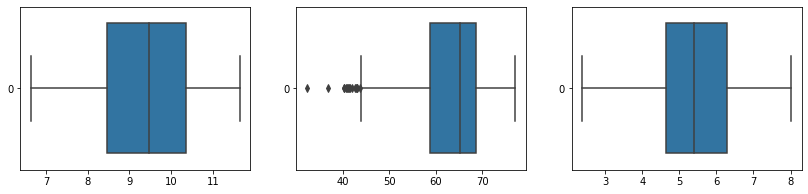

In [95]:
fig, axs = plt.subplots(ncols=3, figsize=[14,3])

#DIS: This is the weighted distances to five Boston employment centers
sns.boxplot(data=hap['gdp_per_capita'], orient="h", ax=axs[0])

#This is the proportion of owner-occupied units built prior to 1940
sns.boxplot(data=hap['healthy_life_expectancy_at_birth'], orient="h", ax=axs[1])

sns.boxplot(data=hap['life_Ladder'], orient="h", ax=axs[2])

plt.show()

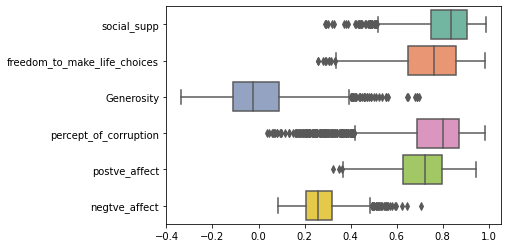

In [96]:
df_2 = hap[['social_supp', 'freedom_to_make_life_choices', 'Generosity', 'percept_of_corruption','postve_affect', 'negtve_affect']]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

In [97]:
probb_happ, poss_happ = tukeys_method(hap, 'Generosity')
# Cálculo directo de outliers probables:

hap['Generosity'][probb_happ].sort_values() # outliers probables


Series([], Name: Generosity, dtype: float64)

In [98]:
print(len(hap['Generosity']))
print(len(hap['Generosity'][poss_happ]))
hap['Generosity'][poss_happ].sort_values() # outliers probables

1949
36


1717    0.400
674     0.401
1825    0.403
1081    0.404
755     0.408
590     0.410
1080    0.410
947     0.416
268     0.418
684     0.422
1714    0.425
752     0.438
945     0.439
589     0.440
751     0.448
1719    0.456
948     0.459
1076    0.464
1190    0.470
756     0.471
946     0.478
758     0.488
1188    0.490
757     0.500
759     0.512
1715    0.525
1716    0.536
1720    0.553
760     0.555
1189    0.561
1182    0.645
1187    0.650
1186    0.679
1185    0.688
1183    0.689
1184    0.698
Name: Generosity, dtype: float64

c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

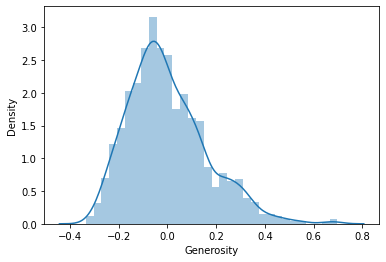

In [99]:
sns.distplot(hap['Generosity'])

c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gen_log', ylabel='Density'>

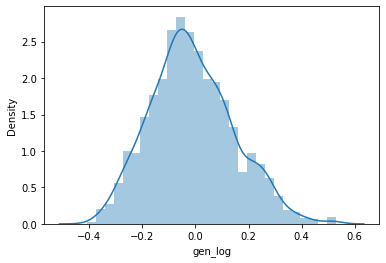

In [100]:
#Transformar 'CRIM' a su valor logaritmo: 
log_CRIM = np.log(hap['Generosity'])
hap['gen_man'] = hap['Generosity']+1
log_CRIM = np.log(hap['gen_man'])
hap['gen_log'] = log_CRIM

#Plot
sns.distplot(hap['gen_log'])

### Cálculo de Outliers en Happines Dataset con Z-Score

In [101]:
# Cálculo mediante spacy. Aplicación a una variable

from scipy import stats
import numpy as np

hap_gen = np.abs(stats.zscore(hap.Generosity))  # Cálculo de Gen

hap_gen3 = np.where(hap_gen > 3)  # filtrar según el umbral 
hap_gen3 = list(hap_gen3[0])

print(hap_gen3) # index

hap["Generosity"][hap_gen3] # índices y valores atípicos de CRIM

[]


Series([], Name: Generosity, dtype: float64)

### Cálculo de Outliers en Happines Dataset con IQR

In [102]:
Q1 = hap.Generosity.quantile(0.25)
Q3 = hap.Generosity.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.20400000000000001


In [103]:
#El siguiente código dará una salida con algunos valores verdaderos y falsos.
# El punto de datos donde tenemos Falso significa que estos valores son válidos,
# mientras que Verdadero indica la presencia de un valor atípico.
print( hap.Generosity < (Q1 - 1.5 * IQR))
print(hap.Generosity > (Q3 + 1.5 * IQR))

0       False
1       False
2       False
3       False
4       False
        ...  
1944    False
1945    False
1946    False
1947    False
1948    False
Name: Generosity, Length: 1949, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1944    False
1945    False
1946    False
1947    False
1948    False
Name: Generosity, Length: 1949, dtype: bool


In [104]:
print( hap.Generosity[hap.Generosity < (Q1 - 1.5 * IQR)])
print(hap.Generosity[hap.Generosity > (Q3 + 1.5 * IQR)])

Series([], Name: Generosity, dtype: float64)
268     0.418
589     0.440
590     0.410
674     0.401
684     0.422
751     0.448
752     0.438
755     0.408
756     0.471
757     0.500
758     0.488
759     0.512
760     0.555
945     0.439
946     0.478
947     0.416
948     0.459
1076    0.464
1080    0.410
1081    0.404
1182    0.645
1183    0.689
1184    0.698
1185    0.688
1186    0.679
1187    0.650
1188    0.490
1189    0.561
1190    0.470
1714    0.425
1715    0.525
1716    0.536
1717    0.400
1719    0.456
1720    0.553
1825    0.403
Name: Generosity, dtype: float64


In [105]:
hap

,country_name,year,life_Ladder,gdp_per_capita,social_supp,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,Generosity,percept_of_corruption,postve_affect,negtve_affect,country,gen_man,gen_log
0,1,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Afghanistan,1.168,0.155293
1,1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Afghanistan,1.190,0.173953
2,1,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Afghanistan,1.121,0.114221
3,1,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Afghanistan,1.162,0.150143
4,1,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Afghanistan,1.236,0.211880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,166,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Zimbabwe,0.905,-0.099820
1945,166,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Zimbabwe,0.902,-0.103141
1946,166,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Zimbabwe,0.932,-0.070422
1947,166,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,Zimbabwe,0.936,-0.066140


In [128]:
df_fin = hap.drop(['country', 'year', 'country_name'], axis=1)

In [129]:
df_fin

,life_Ladder,gdp_per_capita,social_supp,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,Generosity,percept_of_corruption,postve_affect,negtve_affect,gen_man,gen_log
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,1.168,0.155293
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,1.190,0.173953
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,1.121,0.114221
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,1.162,0.150143
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,1.236,0.211880
...,...,...,...,...,...,...,...,...,...,...,...
1944,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,0.905,-0.099820
1945,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,0.902,-0.103141
1946,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,0.932,-0.070422
1947,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,0.936,-0.066140


In [130]:
df_fin.dropna(inplace=True)

In [135]:
outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df_fin)
outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df_bivariate)
#[141, 374, 380, 398, 404, 405, 410, 414, 418, 427]
#print('Número de outlires con Mahalanobis: {}'.format(len(outliers_mahal_rob_bi) ) )
print(50*'**')
#print(outliers_mahal_rob_bi)


c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-76.931073158316352 > -77.502353725862832). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-76.924544773193617 > -77.121602464350161). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should n

c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-77.206690572578097 > -78.185312269902468). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-76.512999992105051 > -77.493977552536876). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should n

c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-76.511023476576739 > -76.848173473847112). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-77.220231274776921 > -78.203459339932579). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
c:\users\wow80\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should n

****************************************************************************************************
